In [1]:
# impor atau mengambil library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium

In [2]:
# masukkan dataframe yang akan digunakan
ispu = pd.read_excel("ISPU Jakarta.xlsx", sheet_name="Sheet1")

In [3]:
#cetak 5 baris pertama
ispu.head()

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
0,2018-01-01,76.0,NaN,31.0,38.0,35.0,9.0
1,2018-01-02,23.0,NaN,31.0,24.0,39.0,14.0
2,2018-01-03,53.0,NaN,35.0,35.0,101.0,23.0
3,2018-01-04,53.0,NaN,49.0,34.0,57.0,15.0
4,2018-01-05,44.0,NaN,32.0,26.0,28.0,10.0


In [4]:
#menghitung persentase nilai yang hilang dalam setiap kolom dataframe
ispu.isna().sum()/len(ispu)*100

Tanggal     0.000000
PM10        0.332226
PM25       59.911406
SO2         0.885936
CO          0.332226
O3          0.110742
NO2         0.276855
dtype: float64

In [5]:
#Menghapus variabel yang mengandung missing values lebih dari 30%
ispu2= ispu.drop(['PM25'], axis=1)

In [6]:
#Menampilkan data setelah variabel PM25 dihapus
ispu2.head()

,Tanggal,PM10,SO2,CO,O3,NO2
0,2018-01-01,76.0,31.0,38.0,35.0,9.0
1,2018-01-02,23.0,31.0,24.0,39.0,14.0
2,2018-01-03,53.0,35.0,35.0,101.0,23.0
3,2018-01-04,53.0,49.0,34.0,57.0,15.0
4,2018-01-05,44.0,32.0,26.0,28.0,10.0


In [7]:
#Mengisi missing values menggunakan metode forward fill ffill() dan backward fill bfill()
ispu2= ispu2.ffill()
ispu2 = ispu2.bfill()

In [8]:
#Memeriksa apakah masih ada missing values
ispu2.isna().sum()/len(ispu2)*100

Tanggal    0.0
PM10       0.0
SO2        0.0
CO         0.0
O3         0.0
NO2        0.0
dtype: float64

In [9]:
#Menambahkan kolom Tahun, Bulan dan Hari pda data frame yang diekstraksi dari kolom Tanggal
ispu2['Tahun'] = pd.DatetimeIndex(ispu2['Tanggal']).year
ispu2['Bulan'] = pd.DatetimeIndex(ispu2['Tanggal']).month
ispu2['Hari'] = ispu2['Tanggal'].dt.day_name()

In [10]:
#Menamplkan 5 baris pertama dataframe
ispu2.head()

,Tanggal,PM10,SO2,CO,O3,NO2,Tahun,Bulan,Hari
0,2018-01-01,76.0,31.0,38.0,35.0,9.0,2018,1,Monday
1,2018-01-02,23.0,31.0,24.0,39.0,14.0,2018,1,Tuesday
2,2018-01-03,53.0,35.0,35.0,101.0,23.0,2018,1,Wednesday
3,2018-01-04,53.0,49.0,34.0,57.0,15.0,2018,1,Thursday
4,2018-01-05,44.0,32.0,26.0,28.0,10.0,2018,1,Friday


In [11]:
ispu4 = ispu
ispu4 = ispu.dropna()
ispu4['Tahun'] = pd.DatetimeIndex(ispu4['Tanggal']).year
ispu4['Bulan'] = pd.DatetimeIndex(ispu4['Tanggal']).month
ispu4['Hari'] = ispu4['Tanggal'].dt.day_name()
ispu4.head

C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\2076204548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ispu4['Tahun'] = pd.DatetimeIndex(ispu4['Tanggal']).year
C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\2076204548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ispu4['Bulan'] = pd.DatetimeIndex(ispu4['Tanggal']).month
C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\2076204548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

<bound method NDFrame.head of         Tanggal  PM10  PM25   SO2    CO    O3   NO2  Tahun  Bulan       Hari
1076 2021-01-01  38.0  53.0  29.0   6.0  31.0  13.0   2021      1     Friday
1077 2021-01-02  27.0  46.0  27.0   7.0  47.0   7.0   2021      1   Saturday
1078 2021-01-03  44.0  58.0  25.0   7.0  40.0  13.0   2021      1     Sunday
1079 2021-01-04  30.0  48.0  24.0   4.0  32.0   7.0   2021      1     Monday
1080 2021-01-05  38.0  53.0  24.0   6.0  31.0   9.0   2021      1    Tuesday
...         ...   ...   ...   ...   ...   ...   ...    ...    ...        ...
1801 2022-12-27  36.0  47.0  58.0  42.0  20.0  18.0   2022     12    Tuesday
1802 2022-12-28  46.0  66.0  57.0  41.0  15.0  19.0   2022     12  Wednesday
1803 2022-12-29  23.0  50.0  57.0  12.0  16.0  15.0   2022     12   Thursday
1804 2022-12-30  40.0  64.0  57.0  21.0  17.0  24.0   2022     12     Friday
1805 2022-12-31  54.0  73.0  56.0  24.0  23.0  24.0   2022     12   Saturday

[704 rows x 10 columns]>

In [12]:
ispu4.head

<bound method NDFrame.head of         Tanggal  PM10  PM25   SO2    CO    O3   NO2  Tahun  Bulan       Hari
1076 2021-01-01  38.0  53.0  29.0   6.0  31.0  13.0   2021      1     Friday
1077 2021-01-02  27.0  46.0  27.0   7.0  47.0   7.0   2021      1   Saturday
1078 2021-01-03  44.0  58.0  25.0   7.0  40.0  13.0   2021      1     Sunday
1079 2021-01-04  30.0  48.0  24.0   4.0  32.0   7.0   2021      1     Monday
1080 2021-01-05  38.0  53.0  24.0   6.0  31.0   9.0   2021      1    Tuesday
...         ...   ...   ...   ...   ...   ...   ...    ...    ...        ...
1801 2022-12-27  36.0  47.0  58.0  42.0  20.0  18.0   2022     12    Tuesday
1802 2022-12-28  46.0  66.0  57.0  41.0  15.0  19.0   2022     12  Wednesday
1803 2022-12-29  23.0  50.0  57.0  12.0  16.0  15.0   2022     12   Thursday
1804 2022-12-30  40.0  64.0  57.0  21.0  17.0  24.0   2022     12     Friday
1805 2022-12-31  54.0  73.0  56.0  24.0  23.0  24.0   2022     12   Saturday

[704 rows x 10 columns]>

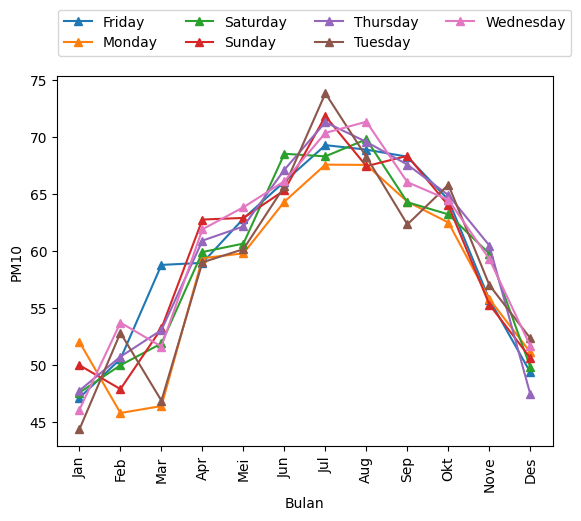

In [13]:
#groupby 
var = 'PM10'
r = ispu2.groupby(['Bulan', 'Hari']).mean()[var]
r.unstack().plot(marker ='^')
plt.ylabel(var)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','Mei'
                                        ,'Jun','Jul','Aug','Sep',
                                         'Okt','Nove','Des'],rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=4)

Text(0.5, 1.0, 'Perbandingan Nilai rata-rata polutan PM10 Tahun 2018 - 2023')

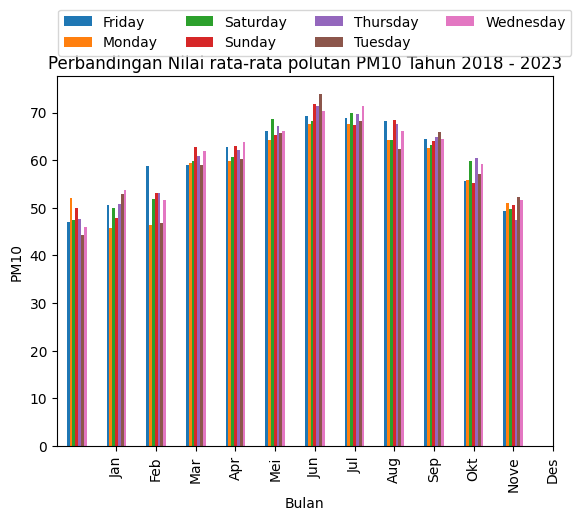

In [14]:
#groupby menggunakan lebih dari satu variabel
var = 'PM10'
r = ispu2.groupby(['Bulan', 'Hari']).mean()[var]
r.unstack().plot.bar()
plt.ylabel(var)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','Mei'
                                        ,'Jun','Jul','Aug','Sep',
                                         'Okt','Nove','Des'],rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=4)
plt.title('Perbandingan Nilai rata-rata polutan '+ var + ' Tahun 2018 - 2023')

Text(0.5, 1.0, 'Perbandingan Nilai rata-rata polutan PM10 Tahun 2018 - 2023')

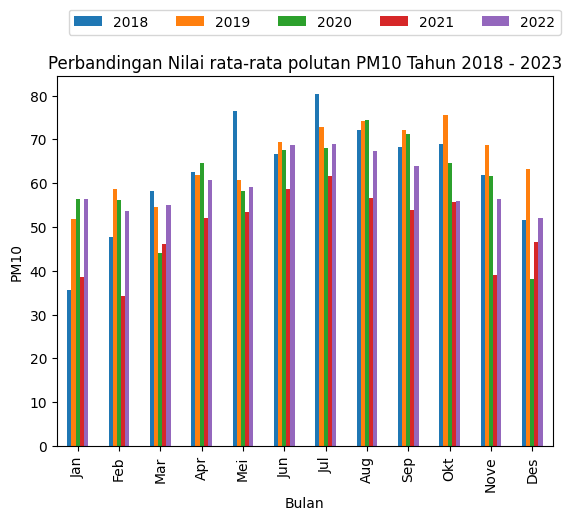

In [15]:
#groupby menggunakan lebih dari satu variabel
var = 'PM10'
r = ispu2.groupby(['Bulan', 'Tahun'])[var].mean()
r.unstack().plot.bar()
plt.ylabel(var)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,],['Jan','Feb','Mar','Apr','Mei'
                                        ,'Jun','Jul','Aug','Sep',
                                        'Okt','Nove','Des'],rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=5)
plt.title('Perbandingan Nilai rata-rata polutan '+ var + ' Tahun 2018 - 2023')

In [16]:
def kategori(df):
    row = df.shape[0]
    df['Kategori'] = ''
    for i in range(0, row):
        if((df.loc[i]['PM10']<=50) & (df.loc[i]['SO2']<=50) & (df.loc[i]['CO']<=50) & (df.loc[i]['O3']<=50) & (df.loc[i]['NO2']<=50)):
            df.loc[i, 'Kategori'] = 'Sehat'
       
        elif((df.loc[i]['PM10']<=100) | (df.loc[i]['SO2']<=100) | (df.loc[i]['CO']<=100) | (df.loc[i]['O3']<=100) |(df.loc[i]['NO2']<=100)):
            df.loc[i, 'Kategori'] = 'Sedang'
        elif((df.loc[i]['PM10']<=200) | (df.loc[i]['SO2']<=200) | (df.loc[i]['CO']<=200) | (df.loc[i]['O3']<=200) |(df.loc[i]['NO2']<=200)):
            df.loc[i, 'Kategori'] = 'Tidak Sehat'
        elif((df.loc[i]['PM10']<=300) | (df.loc[i]['SO2']<=300) | (df.loc[i]['CO']<=300) | (df.loc[i]['O3']<=300) | (df.loc[i]['NO2']<=300)):
            df.loc[i, 'Kategori'] = 'Sangat Tidak Sehat'
        else:
            df.loc[i, 'Kategori'] = 'Berbahaya'
    return df

In [17]:
new_data = kategori(ispu2)

In [18]:
new_data.tail()

,Tanggal,PM10,SO2,CO,O3,NO2,Tahun,Bulan,Hari,Kategori
1801,2022-12-27,36.0,58.0,42.0,20.0,18.0,2022,12,Tuesday,Sedang
1802,2022-12-28,46.0,57.0,41.0,15.0,19.0,2022,12,Wednesday,Sedang
1803,2022-12-29,23.0,57.0,12.0,16.0,15.0,2022,12,Thursday,Sedang
1804,2022-12-30,40.0,57.0,21.0,17.0,24.0,2022,12,Friday,Sedang
1805,2022-12-31,54.0,56.0,24.0,23.0,24.0,2022,12,Saturday,Sedang


Text(0.5, 1.0, 'Jumlah Hari Sesuai Kategori Kualitas Udara')

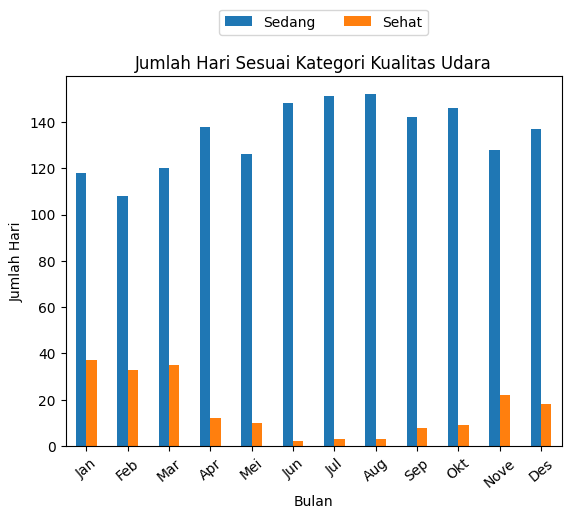

In [19]:
r = new_data.groupby(['Bulan', 'Kategori']).count()['Tanggal']
r.unstack().plot.bar()
plt.ylabel('Jumlah Hari')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,],['Jan','Feb','Mar','Apr','Mei'
                                        ,'Jun','Jul','Aug','Sep',
                                        'Okt','Nove','Des'],rotation=40)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=4)
plt.title('Jumlah Hari Sesuai Kategori Kualitas Udara')

Text(0.5, 1.0, 'Jumlah Hari Sesuai Kategori Kualitas Udara')

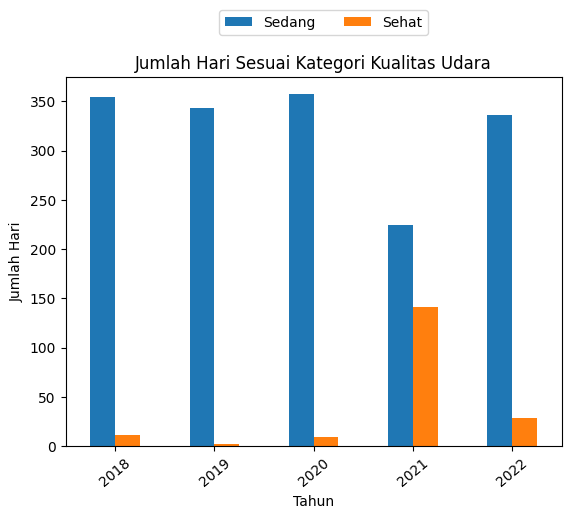

In [20]:
r = new_data.groupby(['Tahun','Kategori']).count()['Tanggal']
r.unstack().plot.bar()
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=40)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=4)
plt.title('Jumlah Hari Sesuai Kategori Kualitas Udara')

C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\1477482544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2, x='Tahun', y= var, palette="RdYlGn")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


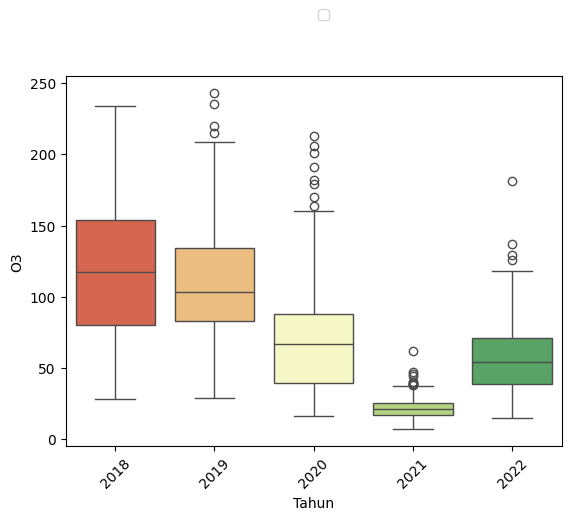

In [21]:
var = 'O3'
sns.boxplot(data=ispu2, x='Tahun', y= var, palette="RdYlGn")
plt.xticks(rotation = 45)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=3)

C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\1253079226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2, x='Bulan', y=var, palette="RdYlGn")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


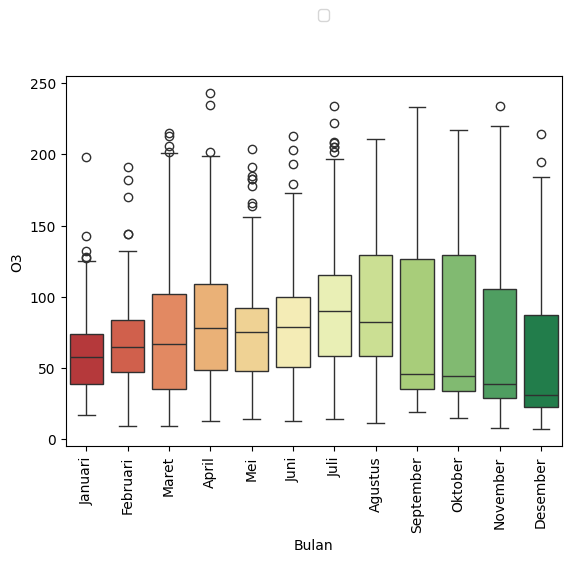

In [22]:
sns.boxplot(data=ispu2, x='Bulan', y=var, palette="RdYlGn")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2),ncol=3)

In [23]:
#Mempersiapkan data untuk menghitung nilai koreasi antar variabel polutan
ispu3 = ispu2.drop(['Tanggal','Tahun','Bulan','Hari', 'Kategori'], axis = 1)
ispu3.head()

,PM10,SO2,CO,O3,NO2
0,76.0,31.0,38.0,35.0,9.0
1,23.0,31.0,24.0,39.0,14.0
2,53.0,35.0,35.0,101.0,23.0
3,53.0,49.0,34.0,57.0,15.0
4,44.0,32.0,26.0,28.0,10.0


In [24]:
c = ispu3.corr()
c

#Menampilkan ispu.corr()


,PM10,SO2,CO,O3,NO2
PM10,1.000000,0.046229,0.261810,0.479959,0.201763
SO2,0.046229,1.000000,-0.133637,-0.213480,0.341069
CO,0.261810,-0.133637,1.000000,0.346942,-0.060208
O3,0.479959,-0.213480,0.346942,1.000000,-0.287379
NO2,0.201763,0.341069,-0.060208,-0.287379,1.000000


In [25]:
colors = [
    'blue', 'darkblue', 'lightblue', 'deepskyblue', 'red', 
    'green', 'purple', 'orange', 'darkred', 'chocolate', 'gold', 
    'darkgreen', 'cadetblue', 'darkviolet', 'pink', 'lightgreen', 
    'teal', 'mediumpurple', 'springgreen', 'lightcoral', 'olivedrab', 
    'olive', 'turquoise', 'lightseagreen', 'magenta', 'khaki', 'springgreen', 
    'hotpink', 'black'
]
#mendefinisikan tabel colors

C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\3060383147.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = c.iloc[x][y]


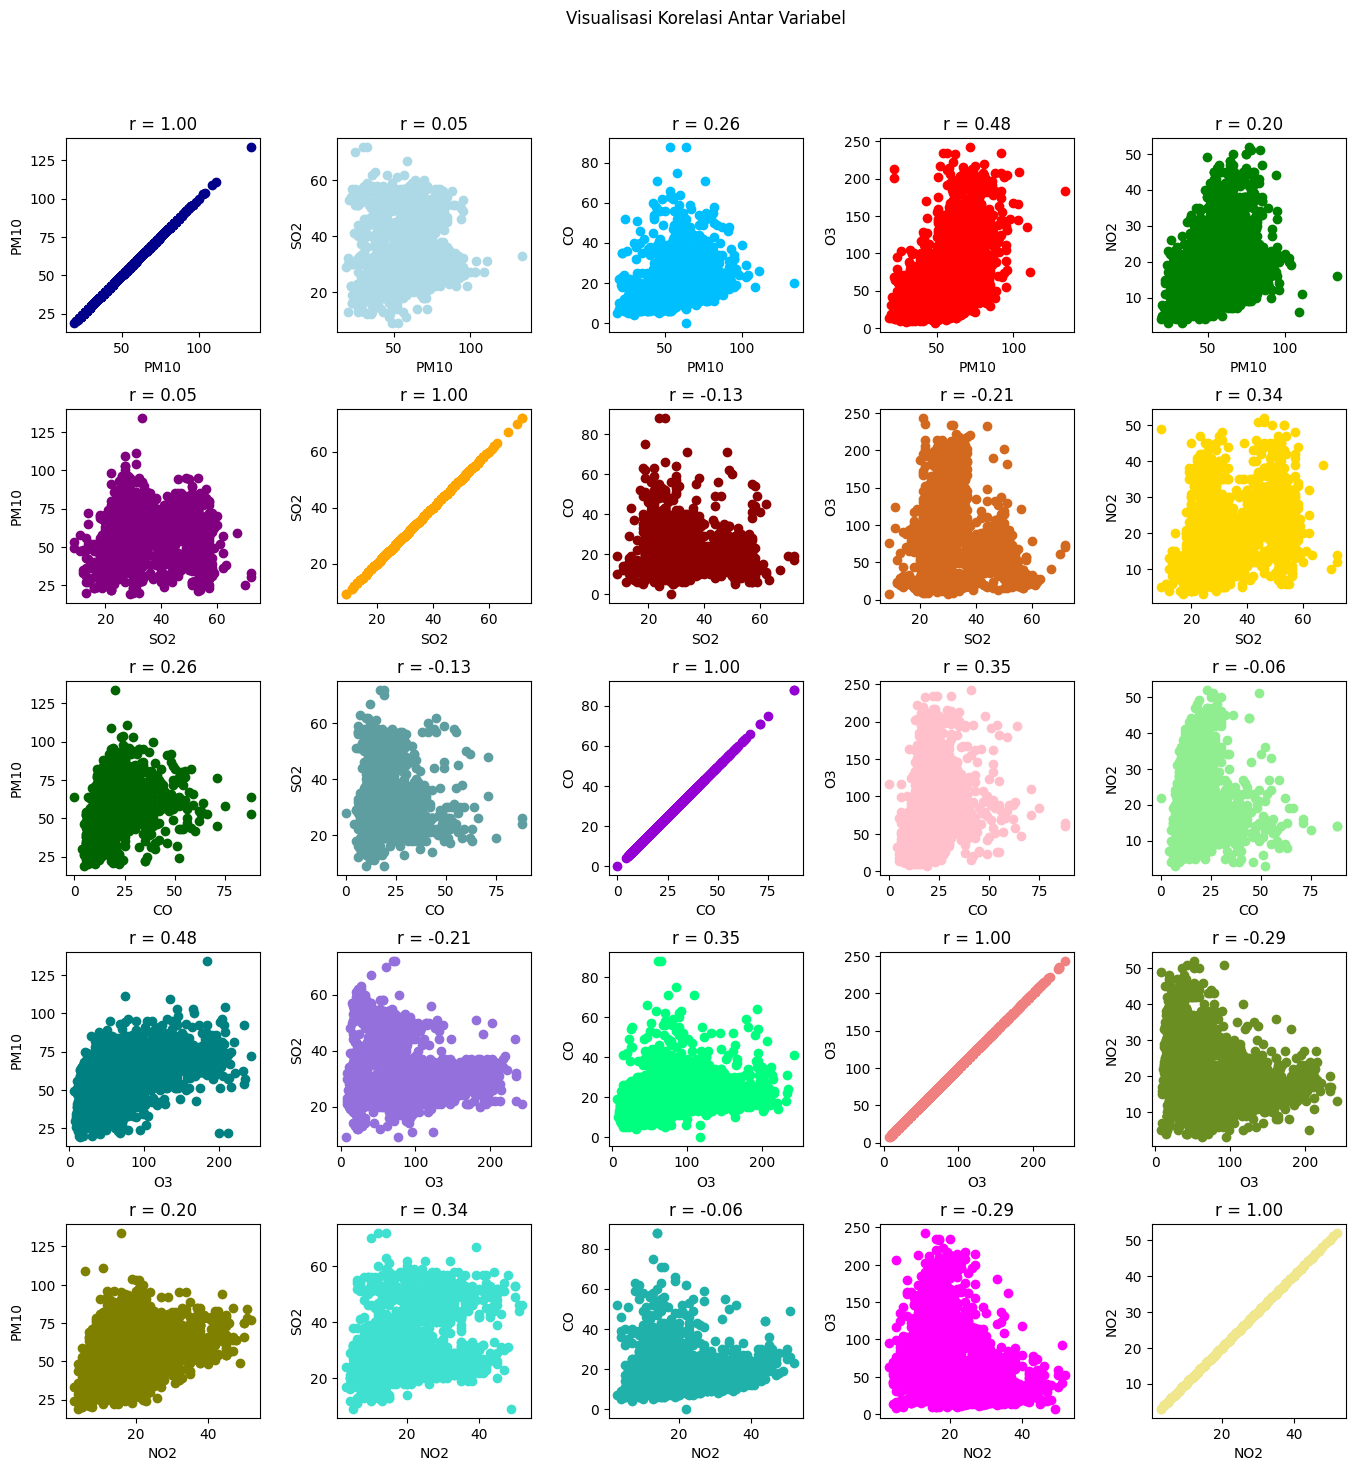

In [26]:
fig = plt.subplots(5,5,figsize=(16,16))#membuat visualisasi scatter plot untuk setiap pasangan variabel dalam dataframe ispu2
plt.subplots_adjust(left=0.1,bottom =0.1,right =0.9,top=0.9,wspace=0.4,hspace=0.4)
col = c.columns
k=1
x=0
for i in col:
  y=0
  for j in col:
    plt.subplot(5,5,k)
    plt.scatter(ispu2[i],ispu2[j],color = colors[k])
    rho = c.iloc[x][y]
    plt.title('r = ' + f'{rho:.2f}')
    plt.xlabel(i)
    plt.ylabel(j)
    k=k+1
    y=y+1
  x=x+1
plt.suptitle("Visualisasi Korelasi Antar Variabel")
plt.show()


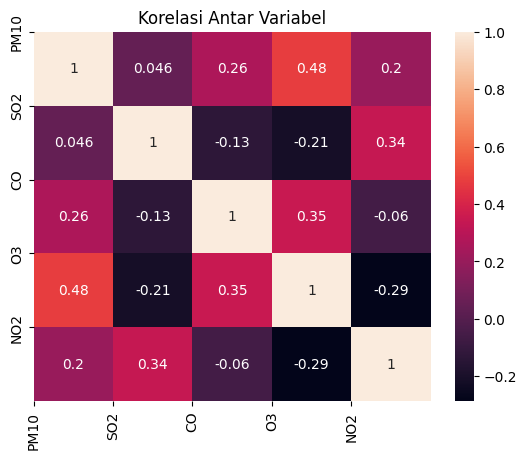

In [27]:
hm = sns.heatmap(data=c, annot=True)#membuat heatmap dari matriks korelasi c / antar variabel dengan menggunakan seaborn
plt.title("Korelasi Antar Variabel")
plt.xticks(range(len(c.columns)), c.columns, rotation=90)
plt.yticks(range(len(c.columns)), c.columns)
plt.show()

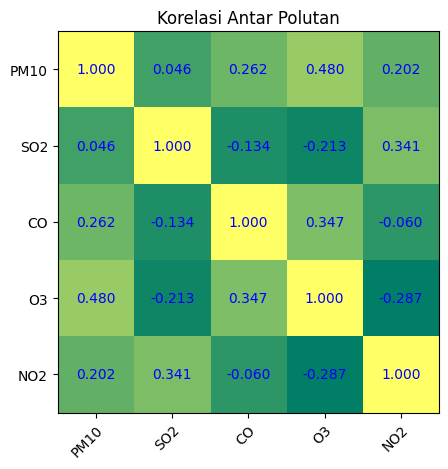

In [28]:
#menghasilkan visualisasi matriks korelasi antar polutan menggunakan heatmap dengan beberapa penyesuaian visualisasi tata letak

fig, ax = plt.subplots()
im = ax.imshow(c, cmap='summer')

plt.xticks(range(len(c.columns)), c.columns, rotation=90)
plt.yticks(range(len(c.columns)), c.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(c)):
    for j in range(len(c)):
        text = ax.text(j, i, f'{c.iloc[i, j]:.3f}',
                       ha="center", va="center", color="b")

ax.set_title("Korelasi Antar Polutan")
fig.tight_layout()
plt.show()


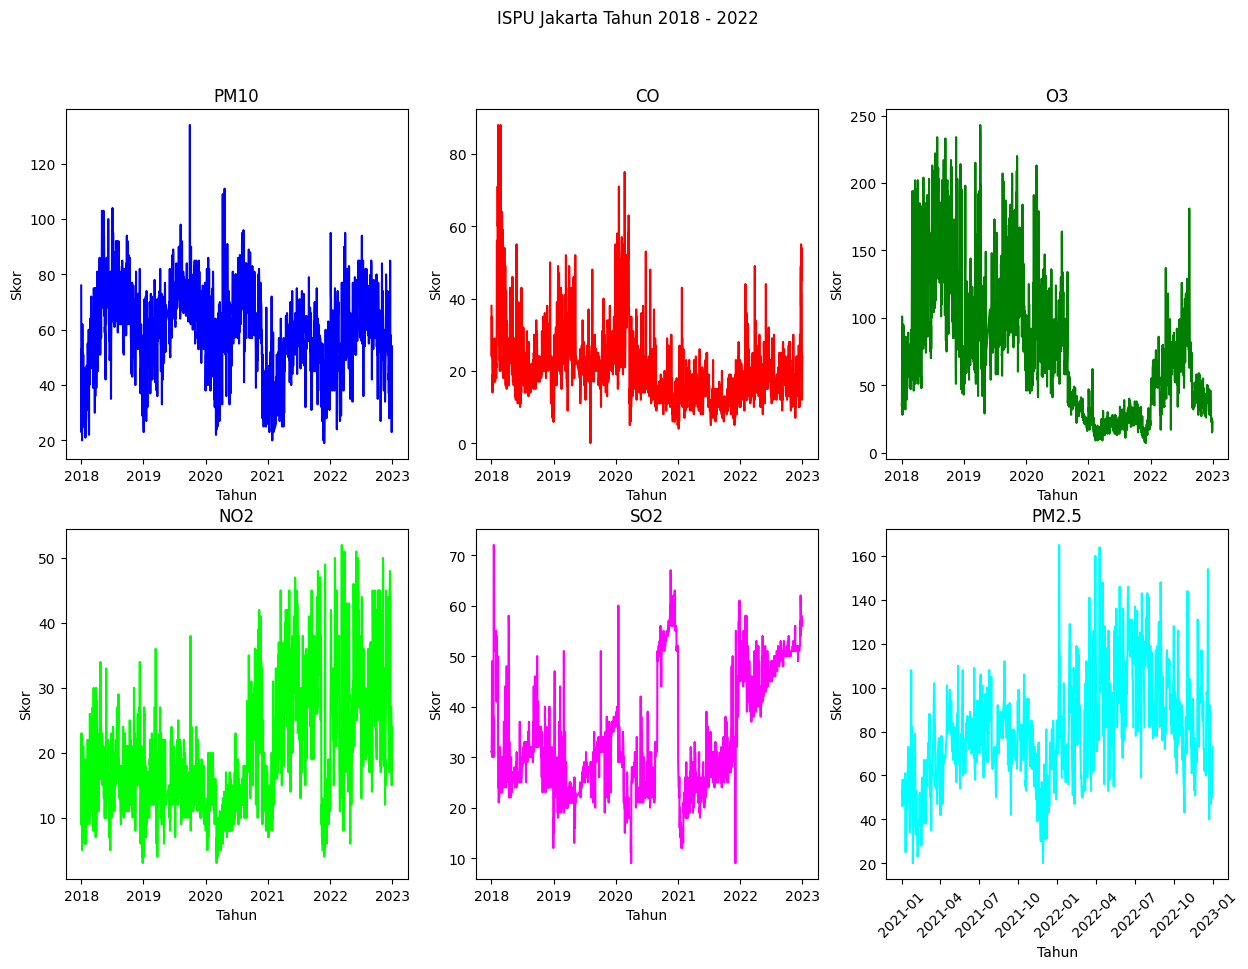

In [29]:
#membuat subplot grid dengan ukuran 2x3 dan menampilkan grafik garis untuk setiap polutan (PM10, CO, O3, NO2, SO2, dan PM25) dalam dataframe ispu2

fig = plt.subplots(2,3,figsize=(15,10))
plt.subplot(2,3,1)
plt.plot(ispu2['Tanggal'],ispu2['PM10'],color='blue')
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,2)
plt.plot(ispu2['Tanggal'],ispu2['CO'],color='red')
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,3)
plt.plot(ispu2['Tanggal'],ispu2['O3'],color='green')
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,4)
plt.plot(ispu2['Tanggal'],ispu2['NO2'],color='lime')
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,5)
plt.plot(ispu2['Tanggal'],ispu2['SO2'],color='magenta')
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,6)
plt.plot(ispu['Tanggal'],ispu['PM25'],color='aqua')
plt.title('PM2.5')
plt.ylabel('Skor')
plt.xlabel('Tahun')
plt.xticks(rotation=45)

plt.suptitle("ISPU Jakarta Tahun 2018 - 2022")
plt.show()

C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\4222085163.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2,x='Tahun',y='PM10',palette="RdYlGn")
C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\4222085163.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2,x='Tahun',y='CO',palette="RdYlGn")
C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\4222085163.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2,x='Tahun',y='O3',palette="RdYlGn")
C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\42220851

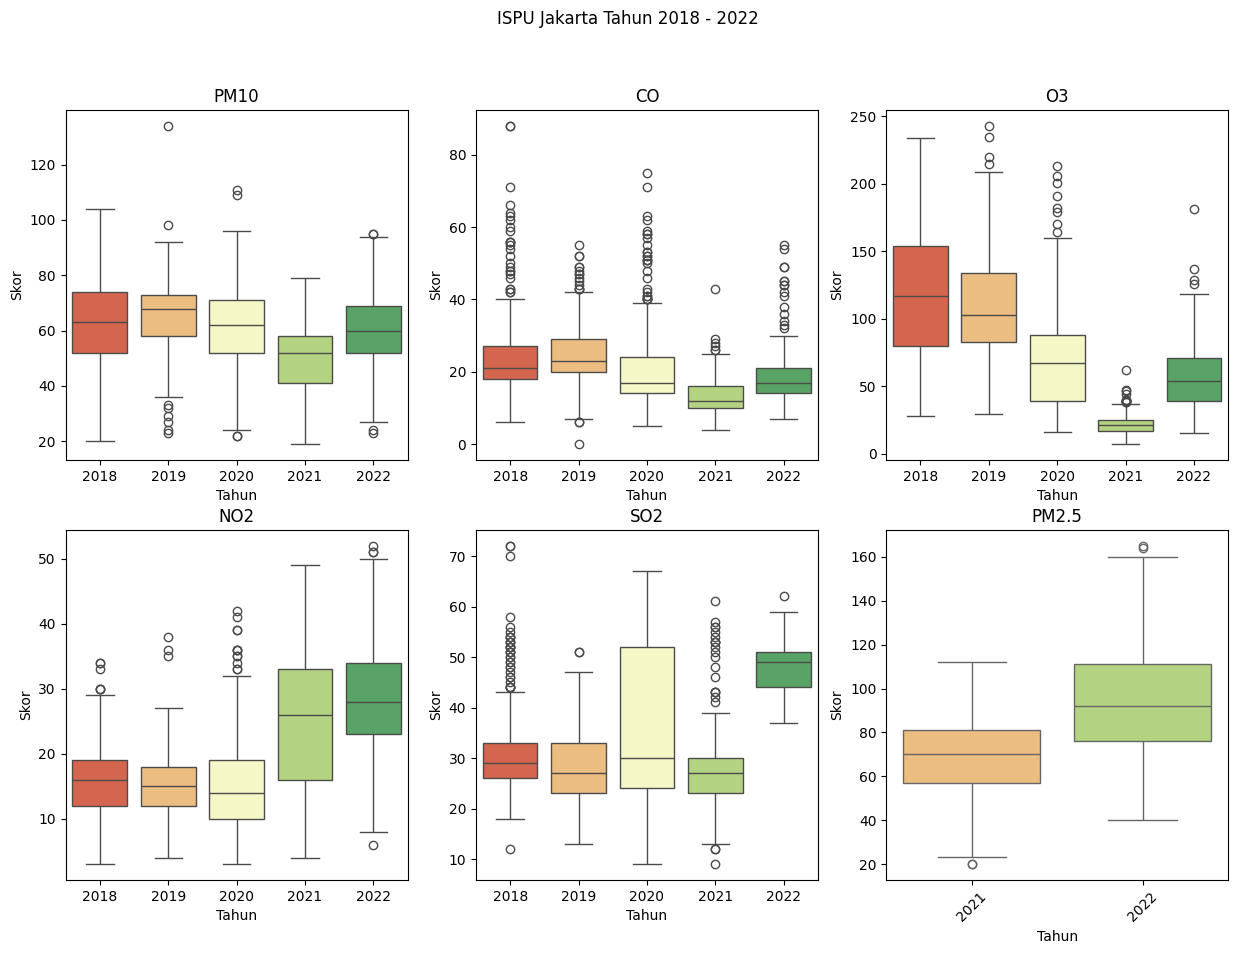

In [30]:
#membuat subplot grid dengan ukuran 2x3 dan menampilkan boxplot untuk setiap polutan (PM10, CO, O3, NO2, SO2, dan PM25) dalam dataframe ispu2 dalam waktu tahun
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(data=ispu2,x='Tahun',y='PM10',palette="RdYlGn")
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,2)
sns.boxplot(data=ispu2,x='Tahun',y='CO',palette="RdYlGn")
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,3)
sns.boxplot(data=ispu2,x='Tahun',y='O3',palette="RdYlGn")
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,4)
sns.boxplot(data=ispu2,x='Tahun',y='NO2',palette="RdYlGn")
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,5)
sns.boxplot(data=ispu2,x='Tahun',y='SO2',palette="RdYlGn")
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,6)
sns.boxplot(data=ispu4,x='Tahun',y='PM25',palette="RdYlGn")
plt.title('PM2.5')
plt.ylabel('Skor')
plt.xlabel('Tahun')
plt.xticks(rotation=45)

plt.suptitle("ISPU Jakarta Tahun 2018 - 2022")
plt.show()

C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\1288123970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2,x='Bulan',y='PM10',palette="RdYlGn")
C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\1288123970.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2,x='Bulan',y='CO',palette="RdYlGn")
C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\1288123970.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2,x='Bulan',y='O3',palette="RdYlGn")
C:\Users\Hernando\AppData\Local\Temp\ipykernel_1844\12881239

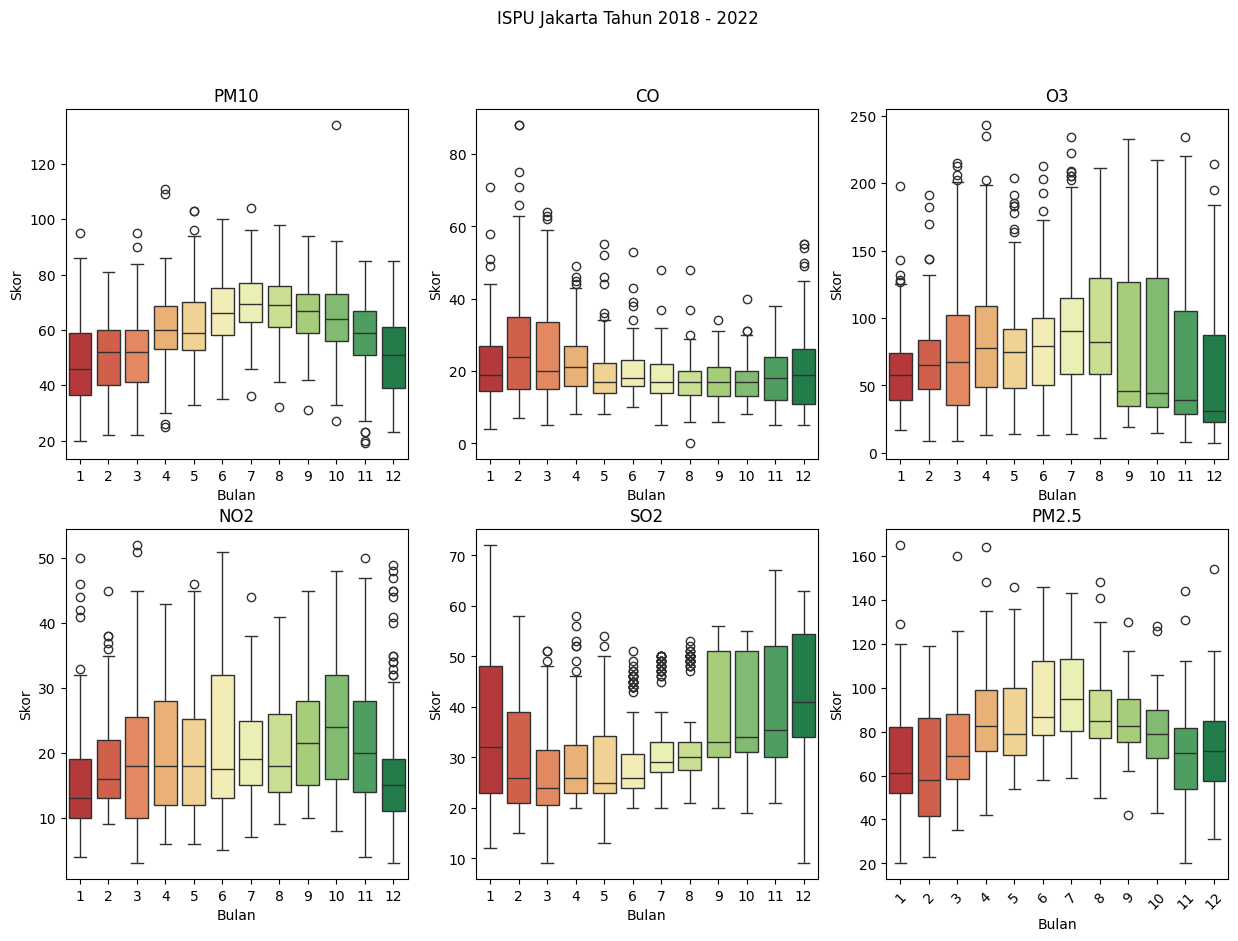

In [31]:
#membuat subplot grid dengan ukuran 2x3 dan menampilkan boxplot untuk setiap polutan (PM10, CO, O3, NO2, SO2, dan PM25) dalam dataframe ispu2 dalam waktu bulan
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(data=ispu2,x='Bulan',y='PM10',palette="RdYlGn")
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,2)
sns.boxplot(data=ispu2,x='Bulan',y='CO',palette="RdYlGn")
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,3)
sns.boxplot(data=ispu2,x='Bulan',y='O3',palette="RdYlGn")
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,4)
sns.boxplot(data=ispu2,x='Bulan',y='NO2',palette="RdYlGn")
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,5)
sns.boxplot(data=ispu2,x='Bulan',y='SO2',palette="RdYlGn")
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,6)
sns.boxplot(data=ispu4,x='Bulan',y='PM25',palette="RdYlGn")
plt.title('PM2.5')
plt.ylabel('Skor')
plt.xlabel('Bulan')
plt.xticks(rotation=45)

plt.suptitle("ISPU Jakarta Tahun 2018 - 2022")
plt.show()